COMBINING MATCHES AND DELIVERIES TO CALCULATE ODDS PREDICTOR

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
deliveries = pd.read_csv("../Data/deliveries_cleaned.csv")
matches = pd.read_csv("../Data/matches_cleaned.csv")

In [3]:
deliveries.head()


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,dismissal_type
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,NaN
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,NaN
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,NaN
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,NaN
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1312200,1,15,6,TA Boult,R Sai Kishore,R Parag,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,NaN
96,1312200,1,16,1,R Parag,LH Ferguson,TA Boult,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,NaN
97,1312200,1,16,2,TA Boult,LH Ferguson,R Parag,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,NaN
98,1312200,1,16,3,R Parag,LH Ferguson,TA Boult,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,NaN


In [4]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 225954 non-null  int64  
 1   innings            225954 non-null  int64  
 2   overs              225954 non-null  int64  
 3   ballnumber         225954 non-null  int64  
 4   batter             225954 non-null  object 
 5   bowler             225954 non-null  object 
 6   non-striker        225954 non-null  object 
 7   extra_type         12049 non-null   object 
 8   batsman_run        225954 non-null  int64  
 9   extras_run         225954 non-null  int64  
 10  total_run          225954 non-null  int64  
 11  non_boundary       225954 non-null  int64  
 12  isWicketDelivery   225954 non-null  int64  
 13  player_out         11151 non-null   object 
 14  kind               11151 non-null   object 
 15  fielders_involved  7988 non-null    object 
 16  Ba

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             950 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

Merging both datasets

In [6]:
df = pd.merge(deliveries, matches, 'inner', on='ID')
df.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'dismissal_type', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method',
       'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1',
       'Umpire2'],
      dtype='object')

Removing Super Over Values and D/L values for now

In [11]:
df.drop(df[df['WonBy'] == 'SuperOver'].index, inplace=True)

In [12]:
df.drop(df[df['method'] == 'D/L'].index, inplace=True)

Modifying Innings

In [13]:
df.loc[(df['TossDecision'] == 'bat') & (df['TossWinner'] == df['BattingTeam']), 'innings'] = 1
df.loc[(df['TossDecision'] == 'bowl') & (df['TossWinner'] != df['BattingTeam']), 'innings'] = 1
df.loc[(df['TossDecision'] == 'bat') & (df['TossWinner'] != df['BattingTeam']), 'innings'] = 2
df.loc[(df['TossDecision'] == 'bowl') & (df['TossWinner'] == df['BattingTeam']), 'innings'] = 2

In [14]:
df['innings'].unique()

array([1, 2], dtype=int64)

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='innings', ylabel='count'>

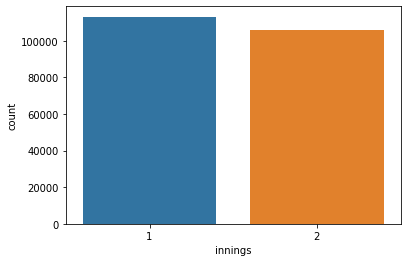

In [60]:
sns.countplot(df['innings'])

In [61]:
inn1 = df[df["innings"] == 1]
inn2 = df[df["innings"] == 2]

In [62]:
inn1.shape

(113101, 37)

In [63]:
inn2.shape

(106011, 37)

Innings 1 Dataset

In [15]:
inn1.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'total_run', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'dismissal_type', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'WinningTeam', 'WonBy', 'Margin', 'runs scored',
       'BowlingTeam', 'bowling_team_points', 'ground_adv', 'batsman_run',
       'non_striker_runs'],
      dtype='object')

In [16]:
inn1.drop(['extra_type', 'batsman_run', 'extras_run', 'non_boundary', 'SuperOver', 'method', 'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2'], axis = 1, inplace = True)

KeyError: "['extra_type', 'extras_run', 'non_boundary', 'SuperOver', 'method', 'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2'] not found in axis"

In [66]:
inn1.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'total_run', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'dismissal_type', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'WinningTeam', 'WonBy', 'Margin'],
      dtype='object')

**FEATURES TO BE EXTRACTED FOR WIN PREDICTOR**

Runs Scored   
Run rate  
Points scored by batting team in the season  
Points scored by bowling team in the season  
Home Ground advantage for batting team?  
Batsman 1 runs  
Batsman 2 runs  
Wicket remaining in hand  
Batting team won?  
No of boundaries scored   

In [67]:
inn1.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,isWicketDelivery,player_out,...,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,WonBy,Margin
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,NaN,...,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,Wickets,7.0
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,NaN,...,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,Wickets,7.0
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,NaN,...,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,Wickets,7.0
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,NaN,...,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,Wickets,7.0
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,NaN,...,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,Wickets,7.0


Runs Scored

In [68]:
inn1['runs scored'] = inn1[['ID', 'overs', 'ballnumber', 'total_run']].apply(lambda x: inn1[(inn1['ID'] == x.ID) & (inn1['overs'] <= x.overs) & (inn1['ballnumber'] <= x.ballnumber)]['total_run'].sum() + 0, axis = 1)

C:\Users\siddr\AppData\Local\Temp\ipykernel_14816\193101217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inn1['runs scored'] = inn1[['ID', 'overs', 'ballnumber', 'total_run']].apply(lambda x: inn1[(inn1['ID'] == x.ID) & (inn1['overs'] <= x.overs) & (inn1['ballnumber'] <= x.ballnumber)]['total_run'].sum() + 0, axis = 1)


In [69]:
inn1.to_csv('../Data/inning1.csv', index = False)

Run Rate Calculation

In [73]:
inn1['runrate'] = inn1[['runs scored', 'overs', 'ballnumber']].apply(lambda x: x['runs scored']/(x['overs'] + (x['ballnumber']/6)), axis = 1)

Points scored by batting team

In [71]:
inn1['Season'].unique()

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

In [72]:
matches['Season'].unique()

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

In [73]:
matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [74]:
matches['Date'] = pd.to_datetime(matches['Date'])
inn1['Date'] = pd.to_datetime(inn1['Date'])

C:\Users\siddr\AppData\Local\Temp\ipykernel_14816\3868047629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inn1['Date'] = pd.to_datetime(inn1['Date'])


In [75]:
matches['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', nan,
       'Rising Pune Supergiants', 'Kochi Tuskers Kerala'], dtype=object)

In [76]:
inn1['BattingTeam'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiants',
       'Kochi Tuskers Kerala'], dtype=object)

In [57]:
inn1['batting_team_points'] = inn1[['Season', 'ID', 'Date', 'BattingTeam']].apply(lambda x: (matches[(matches['Season'] == x['Season']) & (matches['Date'] < x['Date']) & (matches['WinningTeam'] == x['BattingTeam'])].shape[0] * 2), axis = 1)

Bowling Team Points

In [78]:
inn1['ID'] = pd.to_numeric(inn1['ID'])
matches['ID'] = pd.to_numeric(matches['ID'])

C:\Users\siddr\AppData\Local\Temp\ipykernel_14816\3441927820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inn1['ID'] = pd.to_numeric(inn1['ID'])


In [79]:
inn1.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'total_run', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'dismissal_type', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'WinningTeam', 'WonBy', 'Margin', 'runs scored',
       'runrate', 'batting_team_points'],
      dtype='object')

In [80]:
inn1 = pd.read_csv('../Data/inning1.csv')

C:\Users\siddr\AppData\Local\Temp\ipykernel_14816\2467493306.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  inn1 = pd.read_csv('../Data/inning1.csv')


In [81]:
matches['TossDecision'].unique()

array(['bat', 'field'], dtype=object)

In [82]:
def BowlingTeamFinder(x):
    if x['Team1'] == x['TossWinner']:
        return x['Team1'] if x['TossDecision'] == 'field' else x['Team2']
    else:
        return x['Team2'] if x['TossDecision'] == 'field' else x['Team1']

In [83]:
matches['BowlingTeam'] = matches[['Team1', 'Team2', 'TossWinner', 'TossDecision']].apply(lambda x: BowlingTeamFinder(x), axis = 1)

In [84]:
inn1['BowlingTeam'] = inn1[['Team1', 'Team2', 'TossWinner', 'TossDecision']].apply(lambda x: BowlingTeamFinder(x), axis = 1)

In [85]:
inn1['bowling_team_points'] = inn1[['Season', 'ID', 'Date', 'BowlingTeam']].apply(lambda x: (matches[(matches['Season'] == x['Season']) & (matches['Date'] < x['Date']) & (matches['WinningTeam'] == x['BowlingTeam'])].shape[0] * 2), axis = 1)

Home Ground Advantage for Batting Team

In [86]:
inn1['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiants',
       'Kochi Tuskers Kerala'], dtype=object)

In [88]:
home_grounds = pd.read_csv('../Data/home ground.csv')

In [99]:
home_grounds.loc[home_grounds['team1'] == 'Gujarat Lions', 'team1'] = 'Gujarat Titans'
home_grounds.loc[home_grounds['team1'] == 'Kings XI Punjab', 'team1'] = 'Punjab Kings'
home_grounds.iloc[-1] = ['Lucknow Super Giants', 'Lucknow']

In [100]:
home_grounds

,team1,city
0,Chennai Super Kings,Chennai
1,Delhi Capitals,Delhi
2,Gujarat Titans,Rajkot
3,Punjab Kings,Chandigarh
4,Kochi Tuskers Kerala,Kochi
5,Kolkata Knight Riders,Kolkata
6,Mumbai Indians,Mumbai
7,Rajasthan Royals,Jaipur
8,Rising Pune Supergiants,Pune
9,Royal Challengers Bangalore,Bangalore


In [111]:
def groundAdvCalculator(x):
  adv = 0
  adv += 1 if x['City'] == home_grounds[home_grounds['team1'] == x['BattingTeam']]['city'].iloc[0] else 0
  adv -= 1 if x['City'] == home_grounds[home_grounds['team1'] == x['BowlingTeam']]['city'].iloc[0] else 0
  return adv

In [112]:
inn1['ground_adv'] = inn1.apply(lambda x: groundAdvCalculator(x), axis = 1)

Batsman 1 Runs

In [115]:
inn1.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'total_run', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'dismissal_type', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'WinningTeam', 'WonBy', 'Margin', 'runs scored',
       'BowlingTeam', 'bowling_team_points', 'ground_adv'],
      dtype='object')

In [116]:
deliveries.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'dismissal_type'],
      dtype='object')

In [118]:
x = inn1.iloc[200]

In [45]:
d1 = deliveries[deliveries['innings'] == 1]

In [46]:
d1[(d1['ID'] == x.ID) & ((d1.overs < x.overs) | ((d1.overs == x.overs) & d1.ballnumber <= x.ballnumber)) & (d1.batter == x.batter)]['batsman_run'].sum()

15

In [167]:
inn1['batsman_run'] = inn1.apply(lambda x: d1[(d1['ID'] == x.ID) & ((d1.overs < x.overs) | ((d1.overs == x.overs) & (d1.ballnumber <= x.ballnumber))) & (d1.batter == x['batter'])]['batsman_run'].sum(), axis = 1)

In [147]:
inn1['non_striker_runs'] = inn1.apply(lambda x: d1[(d1['ID'] == x.ID) & ((d1.overs < x.overs) | ((d1.overs == x.overs) & (d1.ballnumber <= x.ballnumber))) & (d1.batter == x['non-striker'])]['batsman_run'].sum(), axis = 1)

In [159]:
x = inn1.iloc[12]

In [169]:
inn1.to_csv('../Data/inning1.csv', index = False)

In [13]:
inn1 = pd.read_csv('../Data/inning1.csv')

C:\Users\siddr\AppData\Local\Temp\ipykernel_4268\2467493306.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  inn1 = pd.read_csv('../Data/inning1.csv')


In [8]:
inn1.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'total_run', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'dismissal_type', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'WinningTeam', 'WonBy', 'Margin', 'runs scored',
       'BowlingTeam', 'bowling_team_points', 'ground_adv', 'batsman_run',
       'non_striker_runs'],
      dtype='object')

Wickets Remaining

In [28]:
inn1 = pd.DataFrame(inn1.groupby('ID').apply(lambda x: x.sort_values(['overs', 'ballnumber'])))

In [47]:
inn1.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,isWicketDelivery,player_out,...,TossDecision,WinningTeam,WonBy,Margin,runs scored,BowlingTeam,bowling_team_points,ground_adv,batsman_run,non_striker_runs
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,NaN,...,bat,Gujarat Titans,Wickets,7.0,0,Gujarat Titans,22,0,0,0
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,NaN,...,bat,Gujarat Titans,Wickets,7.0,1,Gujarat Titans,22,0,0,0
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,NaN,...,bat,Gujarat Titans,Wickets,7.0,2,Gujarat Titans,22,0,1,0
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,NaN,...,bat,Gujarat Titans,Wickets,7.0,2,Gujarat Titans,22,0,0,1
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,NaN,...,bat,Gujarat Titans,Wickets,7.0,2,Gujarat Titans,22,0,0,1


In [49]:
inn1['wickets_gone'] = inn1.apply(lambda x: inn1[(inn1['ID'] == x.ID) & (inn1['overs'] <= x.overs) & (inn1['ballnumber'] <= x.ballnumber)]['isWicketDelivery'].sum(), axis = 1)

In [51]:
inn1['wickets_remaining'] = 10 - inn1['wickets_gone']

In [52]:
inn1.to_csv('../Data/inning1.csv', index = False)

Batting Team Won?

In [86]:
inn1['batting_team_won'] = inn1.apply(lambda x: 1 if x['BattingTeam'] == x['WinningTeam'] else 0, axis = 1)

In [72]:
inn1.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'total_run', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'dismissal_type', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'WinningTeam', 'WonBy', 'Margin', 'runs scored',
       'BowlingTeam', 'bowling_team_points', 'ground_adv', 'batsman_run',
       'non_striker_runs', 'wickets_gone', 'wickets_remaining',
       'batting_team_won', 'batting_team_points', 'boundaries_scored'],
      dtype='object')

Boundaries Scored

In [69]:
inn1['boundaries_scored'] = inn1.apply(lambda x: inn1[(inn1.ID == x.ID) & (inn1.overs <= x.overs) & (inn1.ballnumber <= x.ballnumber) & (inn1['total_run'] > 3)]['total_run'].count(), axis = 1)

In [74]:
inn1.to_csv('../Data/inning1.csv', index = False)

In [75]:
inn1.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'total_run', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'dismissal_type', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'WinningTeam', 'WonBy', 'Margin', 'runs scored',
       'BowlingTeam', 'bowling_team_points', 'ground_adv', 'batsman_run',
       'non_striker_runs', 'wickets_gone', 'wickets_remaining',
       'batting_team_won', 'batting_team_points', 'boundaries_scored',
       'runrate'],
      dtype='object')

In [87]:
inn1.drop(['ID', 'innings', 'batter', 'bowler', 'non-striker', 'player_out', 'kind', 'fielders_involved', 'dismissal_type', 'City', 'Date', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'WinningTeam', 'WonBy', 'Margin'], axis = 1, inplace = True)

In [88]:
inn1.columns

Index(['overs', 'ballnumber', 'total_run', 'isWicketDelivery', 'BattingTeam',
       'Season', 'TossWinner', 'TossDecision', 'runs scored', 'BowlingTeam',
       'bowling_team_points', 'ground_adv', 'batsman_run', 'non_striker_runs',
       'wickets_gone', 'wickets_remaining', 'batting_team_won',
       'batting_team_points', 'boundaries_scored', 'runrate'],
      dtype='object')

In [79]:
inn1.to_csv('../Data/final_inning1.csv', index = False)

In [84]:
inn1 = pd.read_csv('../Data/inning1.csv')

c:\Users\siddr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3194: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Encoding Values

In [89]:
inn1.dtypes

overs                    int64
ballnumber               int64
total_run                int64
isWicketDelivery         int64
BattingTeam             object
Season                  object
TossWinner              object
TossDecision            object
runs scored              int64
BowlingTeam             object
bowling_team_points      int64
ground_adv               int64
batsman_run              int64
non_striker_runs         int64
wickets_gone             int64
wickets_remaining        int64
batting_team_won         int64
batting_team_points      int64
boundaries_scored        int64
runrate                float64
dtype: object

In [90]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [91]:
le = LabelEncoder()

In [92]:
le.fit(inn1['BattingTeam'])

LabelEncoder()

In [93]:
inn1['BattingTeam'] = le.transform(inn1['BattingTeam'])

In [94]:
inn1['BowlingTeam'] = le.transform(inn1['BowlingTeam'])

In [95]:
inn1.drop('Season', axis = 1, inplace = True)

In [96]:
inn1['TossWinner'] = le.transform(inn1['TossWinner'])

In [97]:
import category_encoders as ce

In [98]:
enocder = ce.OneHotEncoder(cols='TossDecision', return_df=True, use_cat_names=True)

In [99]:
inn1 = enocder.fit_transform(inn1)

In [100]:
inn1.dtypes

overs                    int64
ballnumber               int64
total_run                int64
isWicketDelivery         int64
BattingTeam              int32
TossWinner               int32
TossDecision_bat         int64
TossDecision_field       int64
runs scored              int64
BowlingTeam              int32
bowling_team_points      int64
ground_adv               int64
batsman_run              int64
non_striker_runs         int64
wickets_gone             int64
wickets_remaining        int64
batting_team_won         int64
batting_team_points      int64
boundaries_scored        int64
runrate                float64
dtype: object

In [101]:
inn1.to_csv('../Data/final_inning1.csv', index = False)